# Analisi dei risultati

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm

In [2]:
df = pd.read_csv("results.csv", delimiter=";")

In [3]:
df

,scheduling,lambda_between_requests,seed,index,node,node_delay (ms),sleep_time (s),actual_time (s)
0,SHORTEST EXPECTED DELAY,0.1,734698132,1,node-b,50,0.04,0.283078
1,SHORTEST EXPECTED DELAY,0.1,734698132,0,node-c,5,0.23,0.429312
2,SHORTEST EXPECTED DELAY,0.1,734698132,3,node-b,50,0.03,0.242848
3,SHORTEST EXPECTED DELAY,0.1,734698132,2,node-c,5,0.15,0.391684
4,SHORTEST EXPECTED DELAY,0.1,734698132,6,node-b,50,0.00,0.307828
...,...,...,...,...,...,...,...,...
149995,ROUND ROBIN,1.0,110878133,95,node-b,50,0.04,0.274444
149996,ROUND ROBIN,1.0,110878133,96,node-c,5,0.11,0.267198
149997,ROUND ROBIN,1.0,110878133,97,node-b,50,0.13,0.353221
149998,ROUND ROBIN,1.0,110878133,98,node-c,5,0.13,0.255431


In [4]:
df_test = df
df_test["requests_per_second"] = 1/df_test["lambda_between_requests"]
df_test = df_test.round({"requests_per_second": 1})
df_test

,scheduling,lambda_between_requests,seed,index,node,node_delay (ms),sleep_time (s),actual_time (s),requests_per_second
0,SHORTEST EXPECTED DELAY,0.1,734698132,1,node-b,50,0.04,0.283078,10.0
1,SHORTEST EXPECTED DELAY,0.1,734698132,0,node-c,5,0.23,0.429312,10.0
2,SHORTEST EXPECTED DELAY,0.1,734698132,3,node-b,50,0.03,0.242848,10.0
3,SHORTEST EXPECTED DELAY,0.1,734698132,2,node-c,5,0.15,0.391684,10.0
4,SHORTEST EXPECTED DELAY,0.1,734698132,6,node-b,50,0.00,0.307828,10.0
...,...,...,...,...,...,...,...,...,...
149995,ROUND ROBIN,1.0,110878133,95,node-b,50,0.04,0.274444,1.0
149996,ROUND ROBIN,1.0,110878133,96,node-c,5,0.11,0.267198,1.0
149997,ROUND ROBIN,1.0,110878133,97,node-b,50,0.13,0.353221,1.0
149998,ROUND ROBIN,1.0,110878133,98,node-c,5,0.13,0.255431,1.0


In [5]:
test = df_test.groupby(["scheduling", "requests_per_second"])[["sleep_time (s)", "actual_time (s)"]].mean()
test

sleep_time (s)  actual_time (s)
scheduling              requests_per_second                                 
LEAST CONNECTIONS       1.0                        0.097492         0.274867
                        1.1                        0.101562         0.278831
                        1.2                        0.101068         0.279300
                        1.4                        0.099546         0.278843
                        1.7                        0.098642         0.280077
                        2.0                        0.101362         0.284656
                        2.5                        0.099414         0.285501
                        3.3                        0.101258         0.291538
                        5.0                        0.102168         0.304767
                        10.0                       0.099164         0.357753
ROUND ROBIN             1.0                        0.099294         0.278047
                        1.1                        0.102066         0.280465
                        1.2                        0.101426         0.280141
                        1.4                        0.098568         0.278322
                        1.7                        0.100234         0.282859
                        2.0                        0.100264         0.285016
                        2.5                        0.100548         0.287214
                        3.3                        0.097816         0.290255
                        5.0                        0.098698         0.302853
                        10.0                       0.099104         0.365505
SHORTEST EXPECTED DELAY 1.0                        0.100008         0.242269
                        1.1                        0.099600         0.242987
                        1.2                        0.098464         0.243590
                        1.4                        0.097538         0.245019
                        1.7                        0.100334         0.252828
                        2.0                        0.099498         0.257096
                        2.5                        0.098552         0.262280
                        3.3                        0.100756         0.273328
                        5.0                        0.101148         0.292715
                        10.0                       0.099588         0.349377

In [6]:
test_sem = df_test.groupby(["scheduling", "requests_per_second"])[["sleep_time (s)", "actual_time (s)"]].std()
test_sem

sleep_time (s)  actual_time (s)
scheduling              requests_per_second                                 
LEAST CONNECTIONS       1.0                        0.096494         0.110567
                        1.1                        0.100306         0.113626
                        1.2                        0.101950         0.114754
                        1.4                        0.100209         0.113957
                        1.7                        0.097994         0.111180
                        2.0                        0.101468         0.113479
                        2.5                        0.101001         0.116115
                        3.3                        0.100256         0.116188
                        5.0                        0.103824         0.123027
                        10.0                       0.098838         0.140060
ROUND ROBIN             1.0                        0.098165         0.111254
                        1.1                        0.101015         0.114737
                        1.2                        0.102329         0.115069
                        1.4                        0.096901         0.112020
                        1.7                        0.104564         0.119350
                        2.0                        0.098840         0.114943
                        2.5                        0.101744         0.116780
                        3.3                        0.097431         0.114881
                        5.0                        0.099874         0.121485
                        10.0                       0.100619         0.152810
SHORTEST EXPECTED DELAY 1.0                        0.102440         0.109575
                        1.1                        0.098974         0.107513
                        1.2                        0.101003         0.109362
                        1.4                        0.098887         0.108161
                        1.7                        0.101758         0.112354
                        2.0                        0.100794         0.110329
                        2.5                        0.099482         0.111453
                        3.3                        0.098745         0.113802
                        5.0                        0.098566         0.116317
                        10.0                       0.100749         0.137896

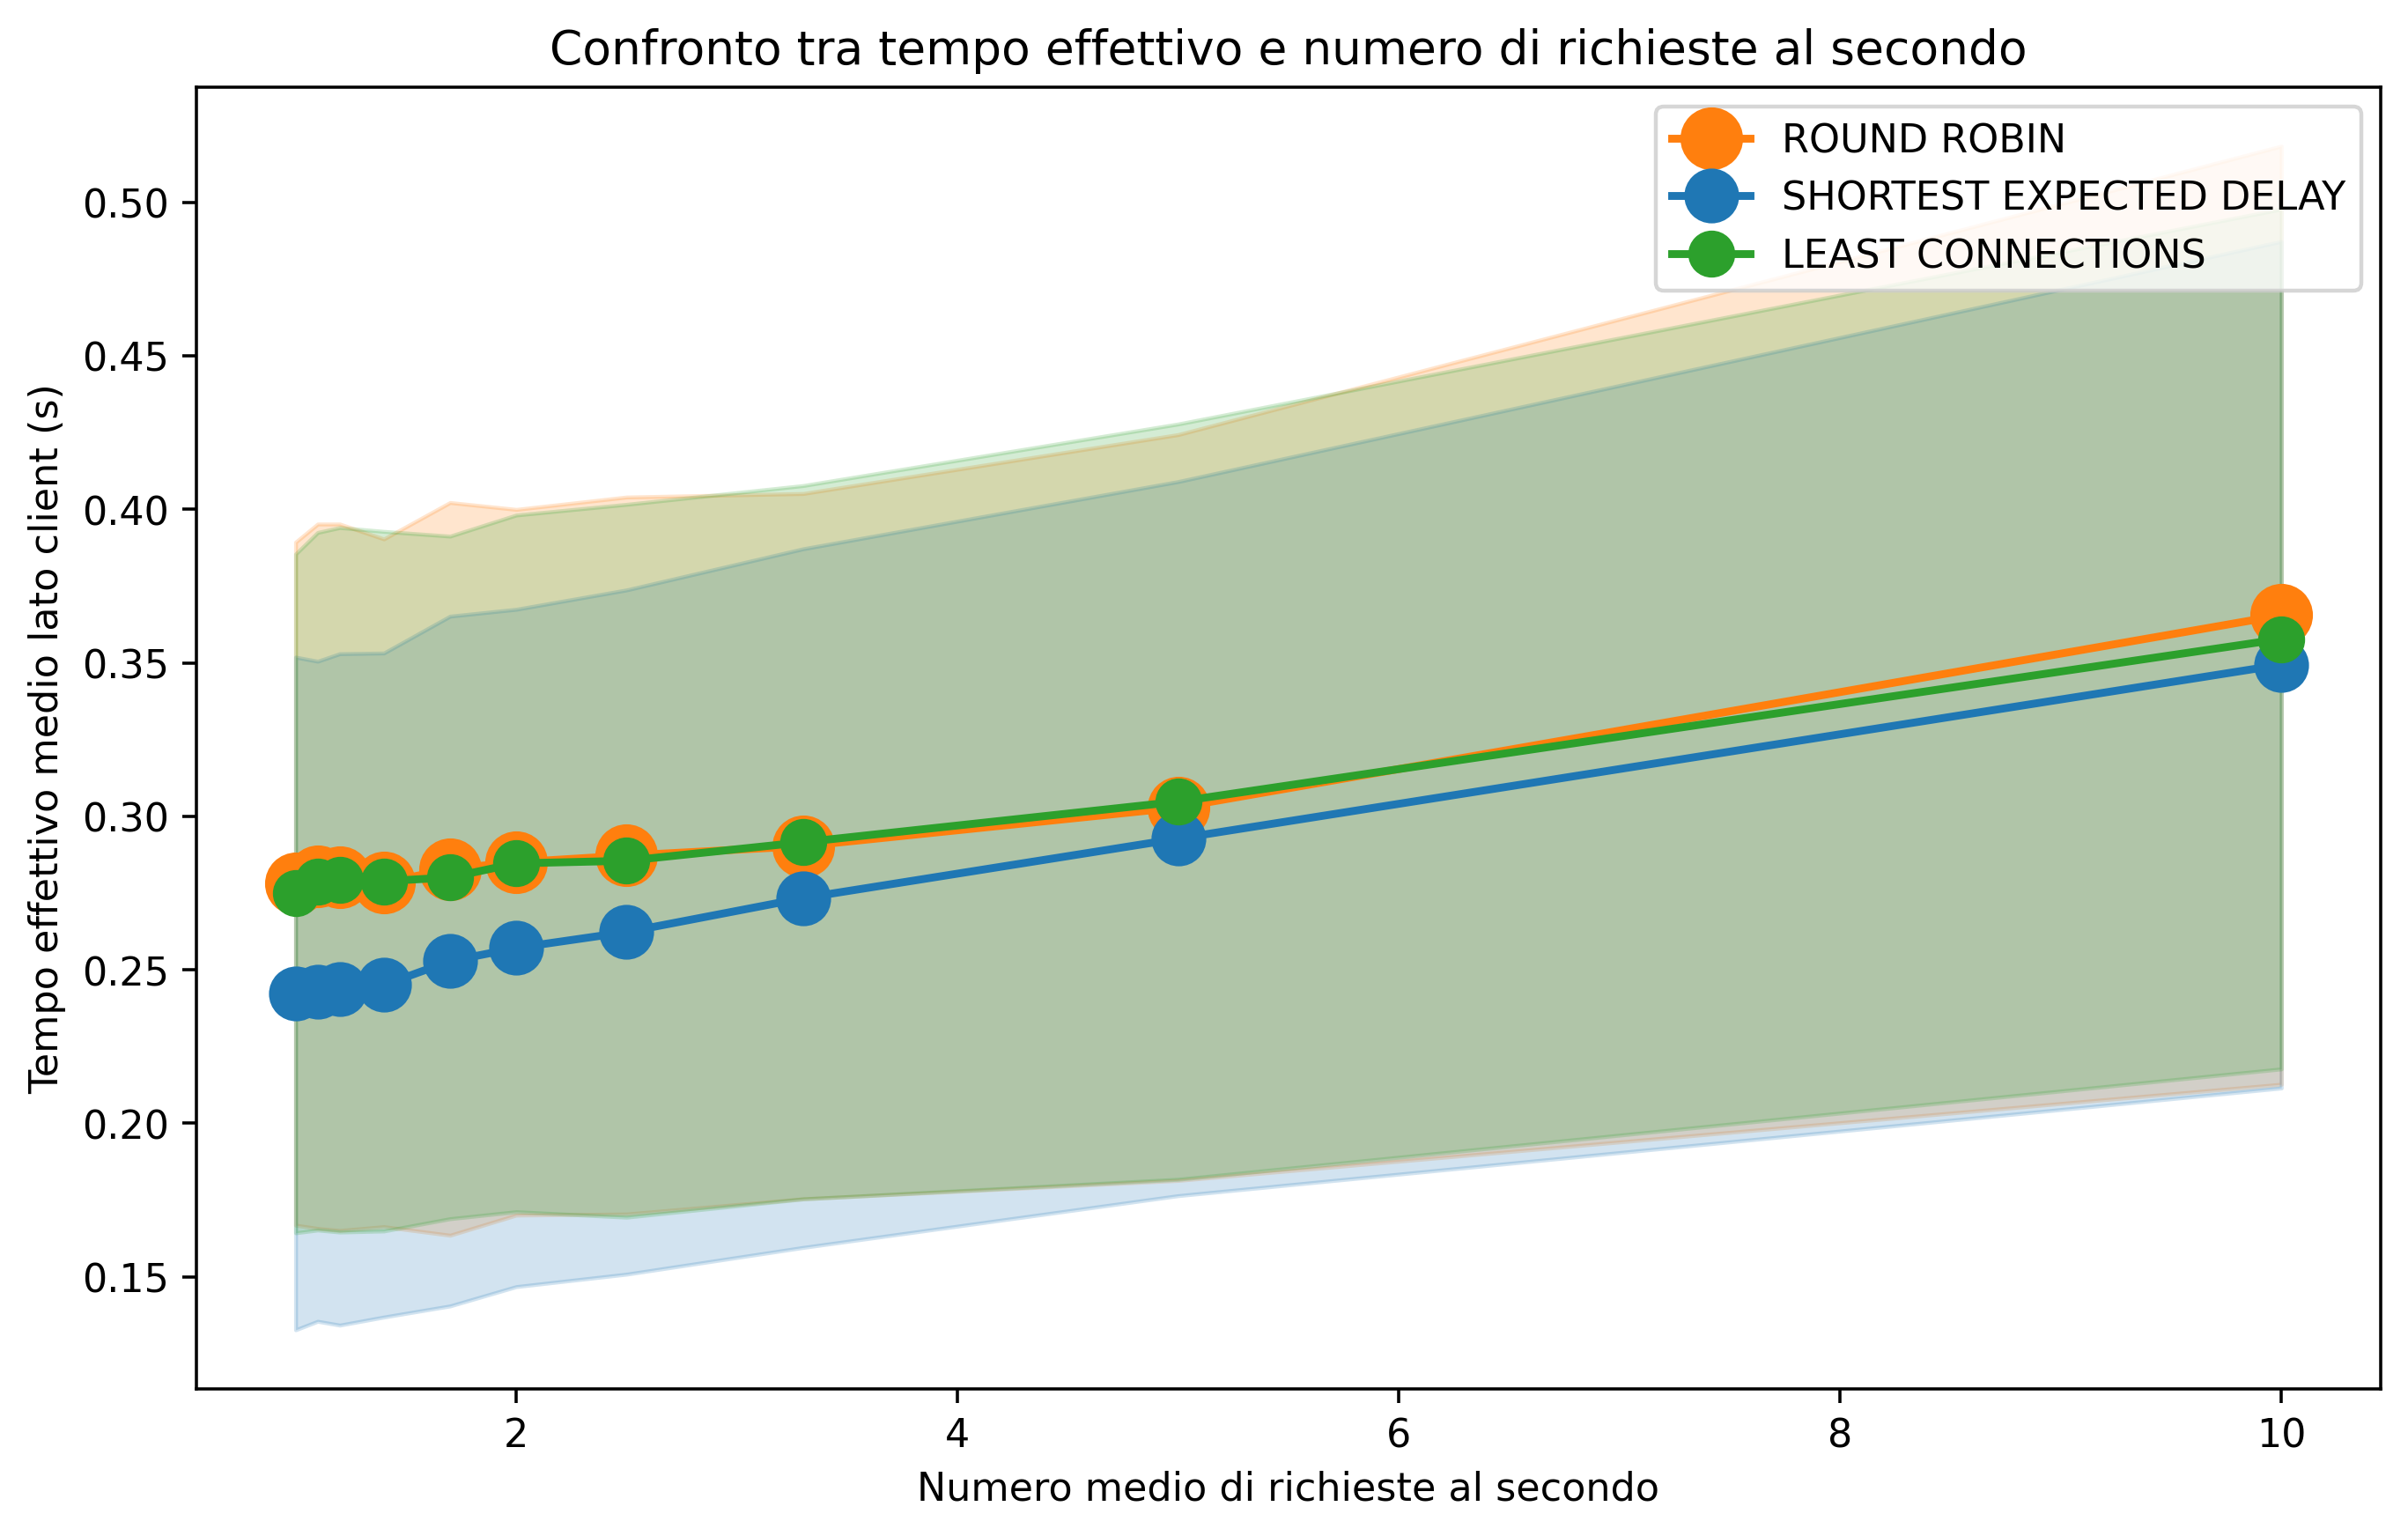

In [7]:
sched,_ = zip(*test.index.values)
sched = set(sched)

figure(figsize=(10, 6), dpi=320)
linecolor = [cm.tab10(1), cm.tab10(0), cm.tab10(2)]

for i,s in enumerate(sched):
    tests = test.loc[s]
    tests_sem = test_sem.loc[s]
    plt.plot(tests.index.values, tests["actual_time (s)"], ".-", label=s, ms=30-4*i, lw=2, color=linecolor[i])
    plt.fill_between(tests.index.values, tests["actual_time (s)"] - tests_sem["actual_time (s)"], tests["actual_time (s)"] + tests_sem["actual_time (s)"], color=linecolor[i], alpha=0.2)

plt.legend()
plt.xlabel('Numero medio di richieste al secondo')
plt.ylabel('Tempo effettivo medio lato client (s)')
plt.title('Confronto tra tempo effettivo e numero di richieste al secondo')
plt.show()

In [8]:
test2 = df_test.groupby(["scheduling", "requests_per_second"])[["node"]].apply(lambda x: (x=='node-b').sum()/50)
test2


node
scheduling              requests_per_second       
LEAST CONNECTIONS       1.0                  49.78
                        1.1                  49.76
                        1.2                  49.88
                        1.4                  49.94
                        1.7                  49.76
                        2.0                  49.92
                        2.5                  49.98
                        3.3                  49.96
                        5.0                  50.02
                        10.0                 50.06
ROUND ROBIN             1.0                  50.00
                        1.1                  50.00
                        1.2                  50.00
                        1.4                  50.00
                        1.7                  50.00
                        2.0                  50.00
                        2.5                  50.00
                        3.3                  50.00
                        5.0                  50.00
                        10.0                 50.00
SHORTEST EXPECTED DELAY 1.0                  15.84
                        1.1                  17.04
                        1.2                  18.28
                        1.4                  19.36
                        1.7                  22.20
                        2.0                  24.86
                        2.5                  27.22
                        3.3                  31.26
                        5.0                  35.20
                        10.0                 41.32

<Axes: xlabel='requests_per_second'>

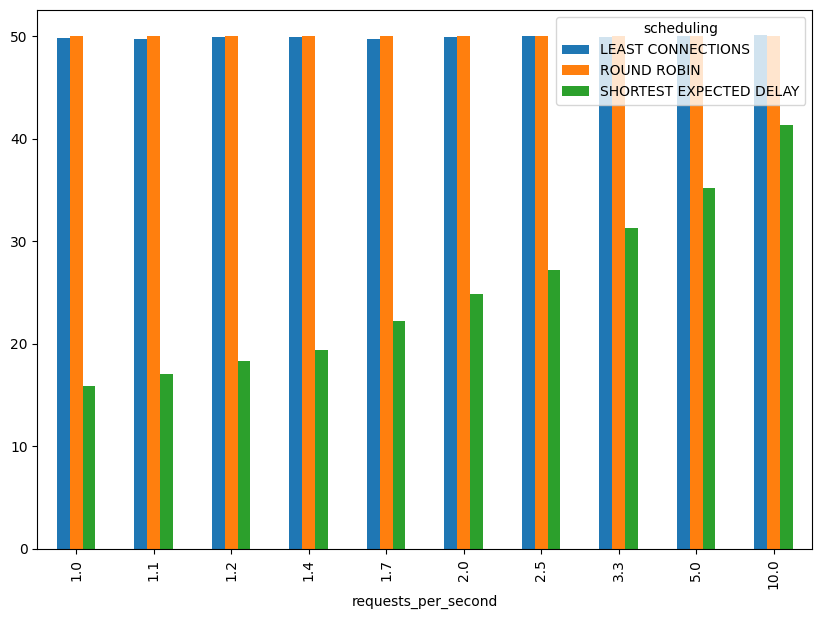

In [9]:
node_b = test2.reset_index().pivot(index="requests_per_second", columns="scheduling", values="node")
node_b.plot(kind="bar", figsize=[10,7])

<Axes: xlabel='requests_per_second'>

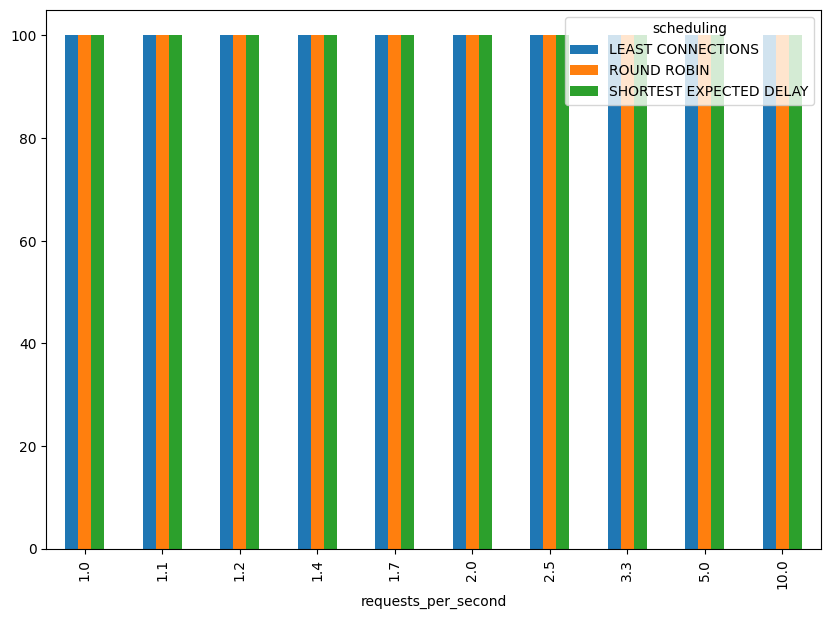

In [10]:
test3 = df_test.groupby(["scheduling", "requests_per_second"])[["node"]].count()/50
node_c = test3.reset_index().pivot(index="requests_per_second", columns="scheduling", values="node")
node_c.plot(kind="bar",  figsize=[10,7])

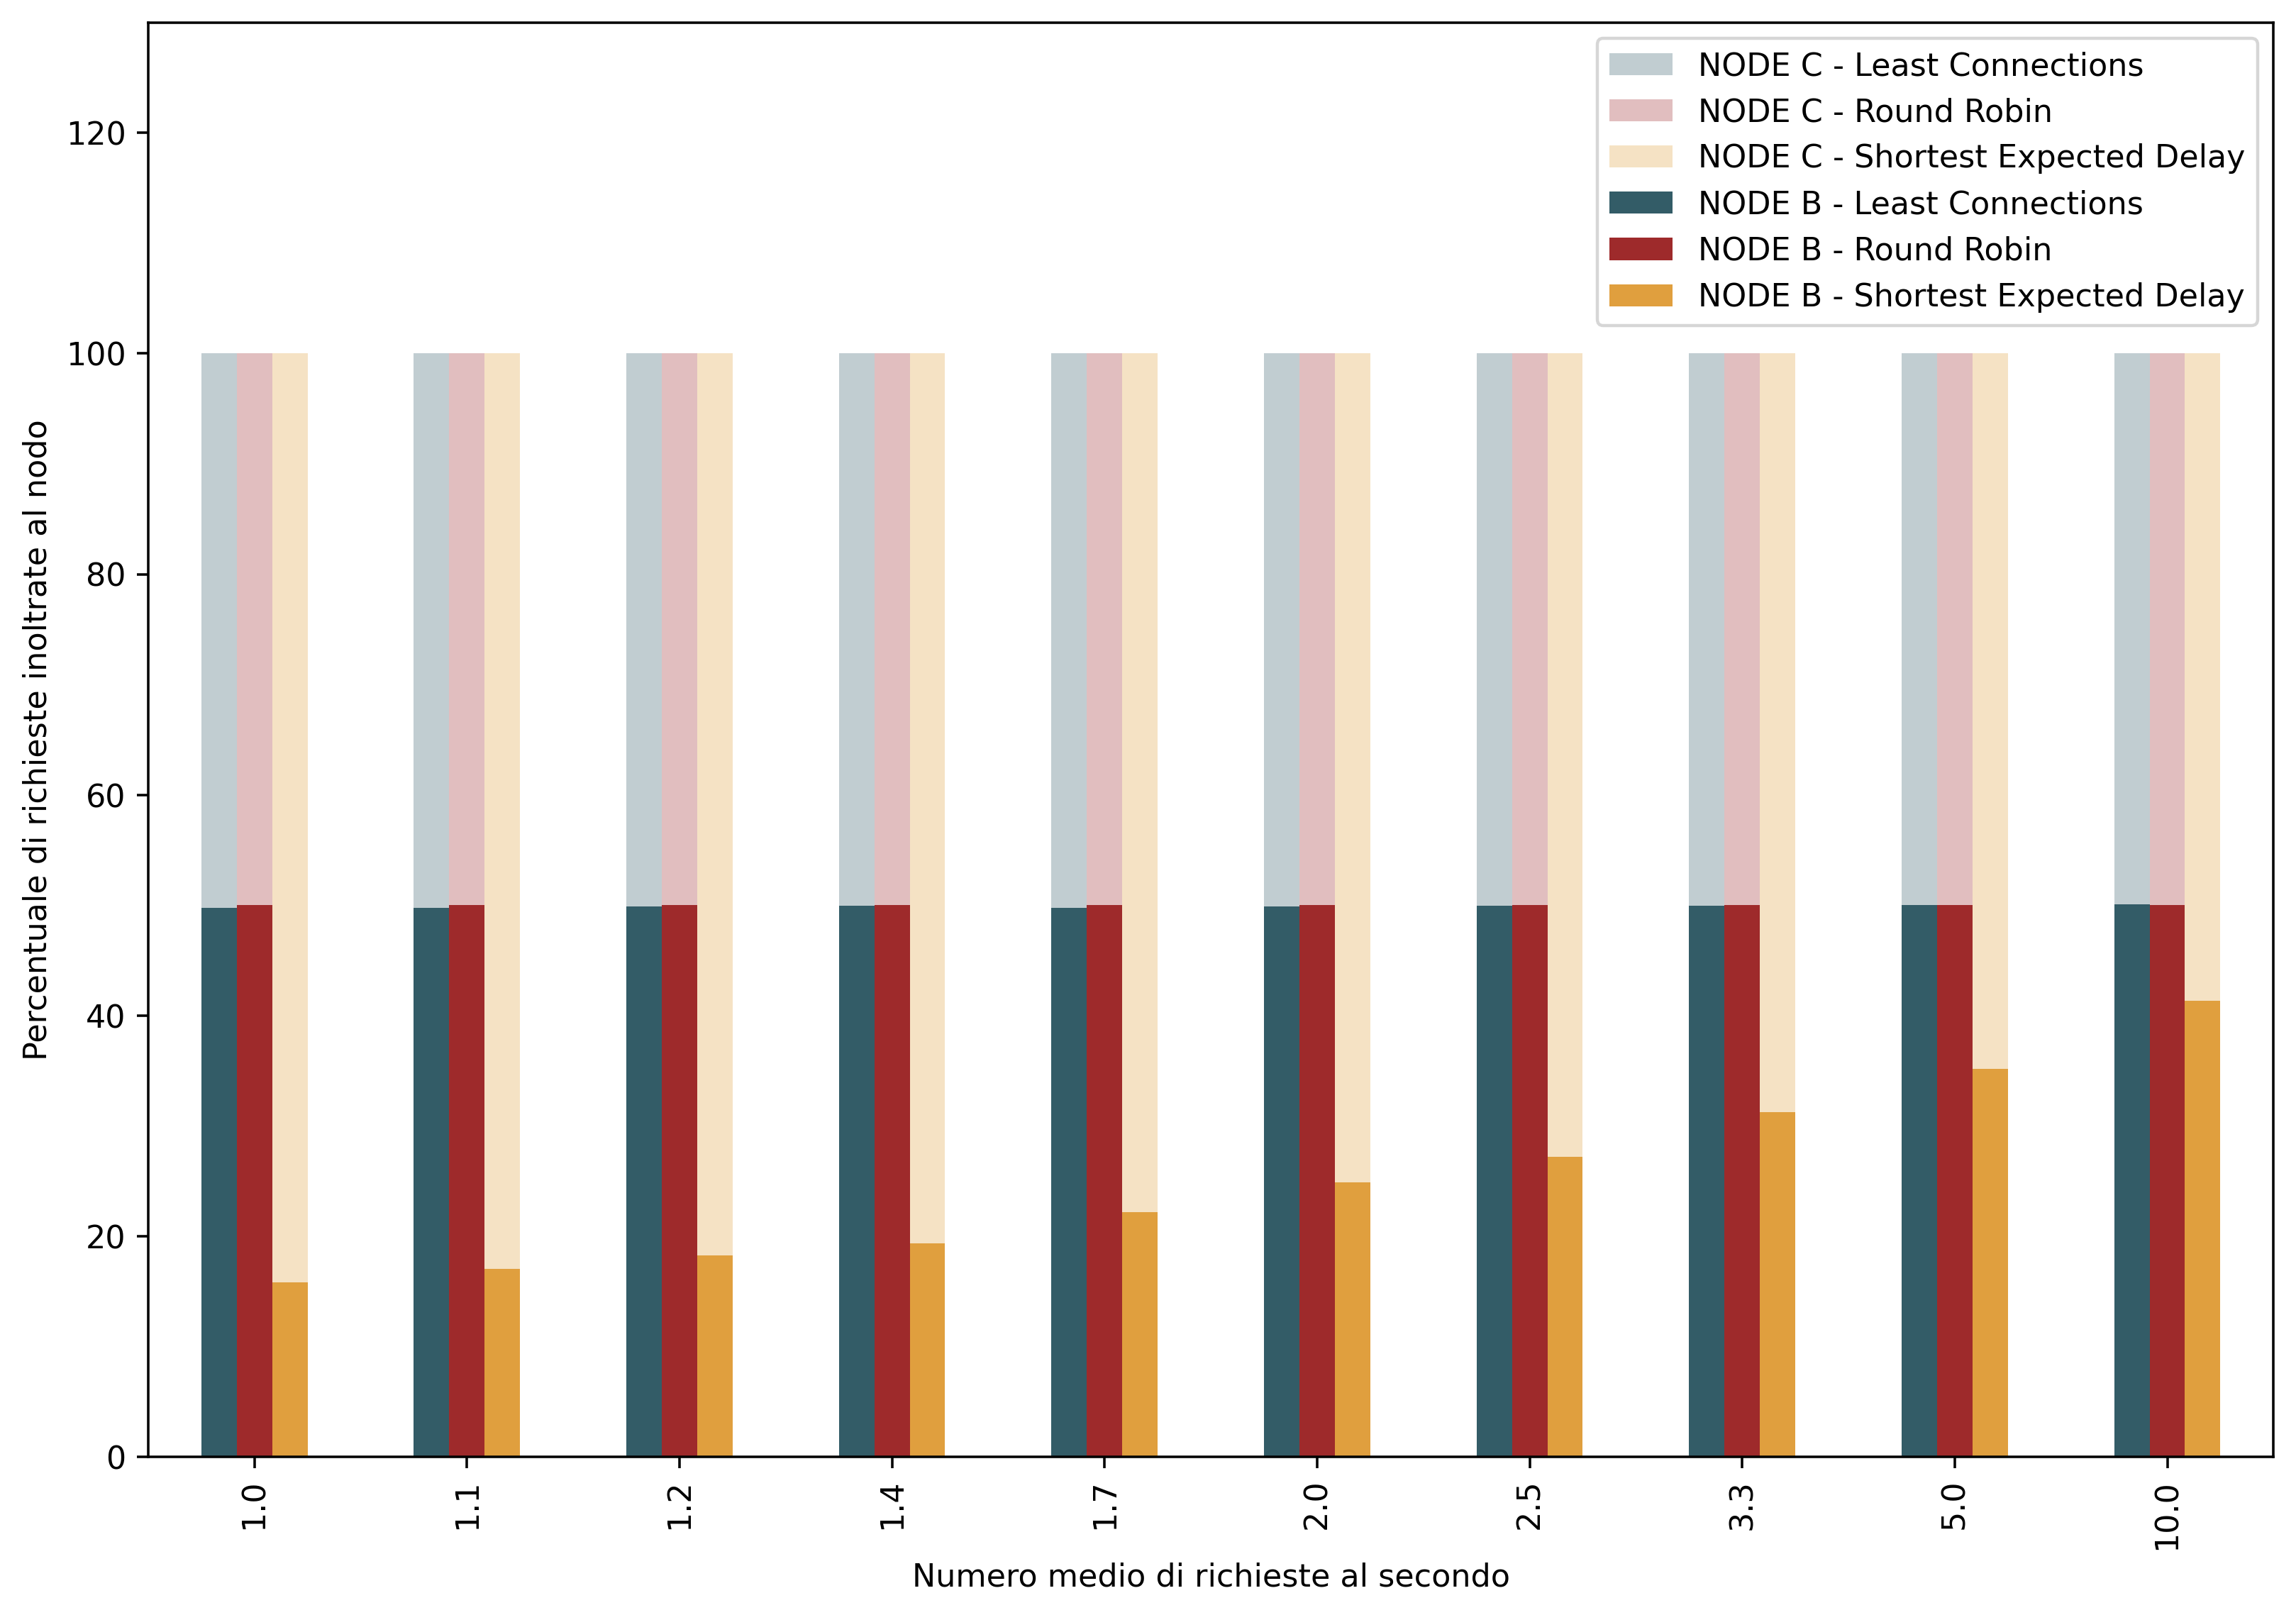

In [11]:
fig, ax = plt.subplots(layout='constrained', dpi=320, figsize=[10,7])

node_c.plot(kind="bar", ax=ax, color=["#335c67", "#9e2a2b", "#e09f3e"], alpha=0.3)
node_b.plot(kind="bar", ax=ax, color=["#335c67", "#9e2a2b", "#e09f3e"])

ax.legend([
    "NODE C - Least Connections", 
    "NODE C - Round Robin",
    "NODE C - Shortest Expected Delay",
    "NODE B - Least Connections", 
    "NODE B - Round Robin",
    "NODE B - Shortest Expected Delay"
])

ax.set_ylim(0,130)

plt.xlabel('Numero medio di richieste al secondo')
plt.ylabel('Percentuale di richieste inoltrate al nodo')
plt.show()

#TODO mettere in primo piano il NODE C

In [12]:
test4 = df_test.groupby(["scheduling", "requests_per_second"])[["node"]].apply(lambda x: (x=='node-c').sum()/50)
test4

node
scheduling              requests_per_second       
LEAST CONNECTIONS       1.0                  50.22
                        1.1                  50.24
                        1.2                  50.12
                        1.4                  50.06
                        1.7                  50.24
                        2.0                  50.08
                        2.5                  50.02
                        3.3                  50.04
                        5.0                  49.98
                        10.0                 49.94
ROUND ROBIN             1.0                  50.00
                        1.1                  50.00
                        1.2                  50.00
                        1.4                  50.00
                        1.7                  50.00
                        2.0                  50.00
                        2.5                  50.00
                        3.3                  50.00
                        5.0                  50.00
                        10.0                 50.00
SHORTEST EXPECTED DELAY 1.0                  84.16
                        1.1                  82.96
                        1.2                  81.72
                        1.4                  80.64
                        1.7                  77.80
                        2.0                  75.14
                        2.5                  72.78
                        3.3                  68.74
                        5.0                  64.80
                        10.0                 58.68

<Axes: xlabel='requests_per_second'>

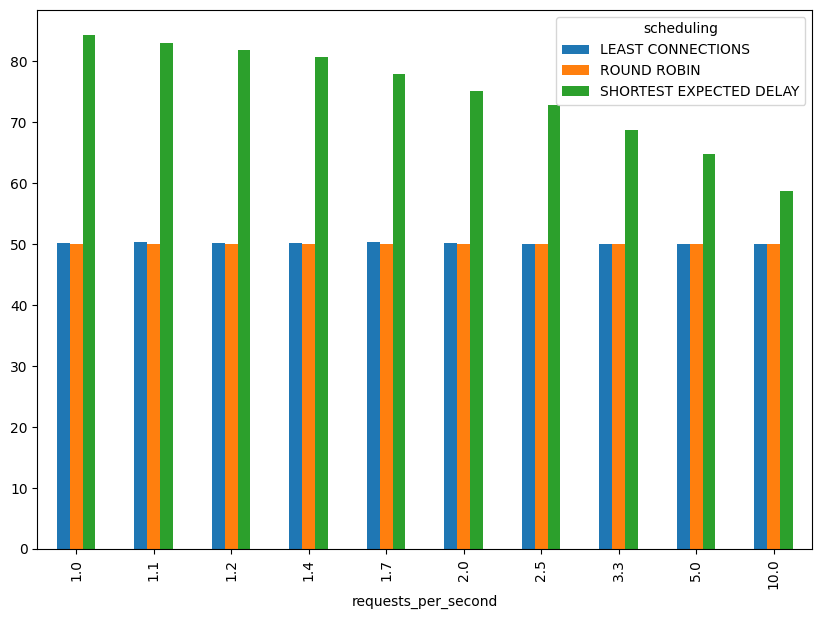

In [13]:
node_c2 = test4.reset_index().pivot(index="requests_per_second", columns="scheduling", values="node")
node_c2.plot(kind="bar", figsize=[10,7])

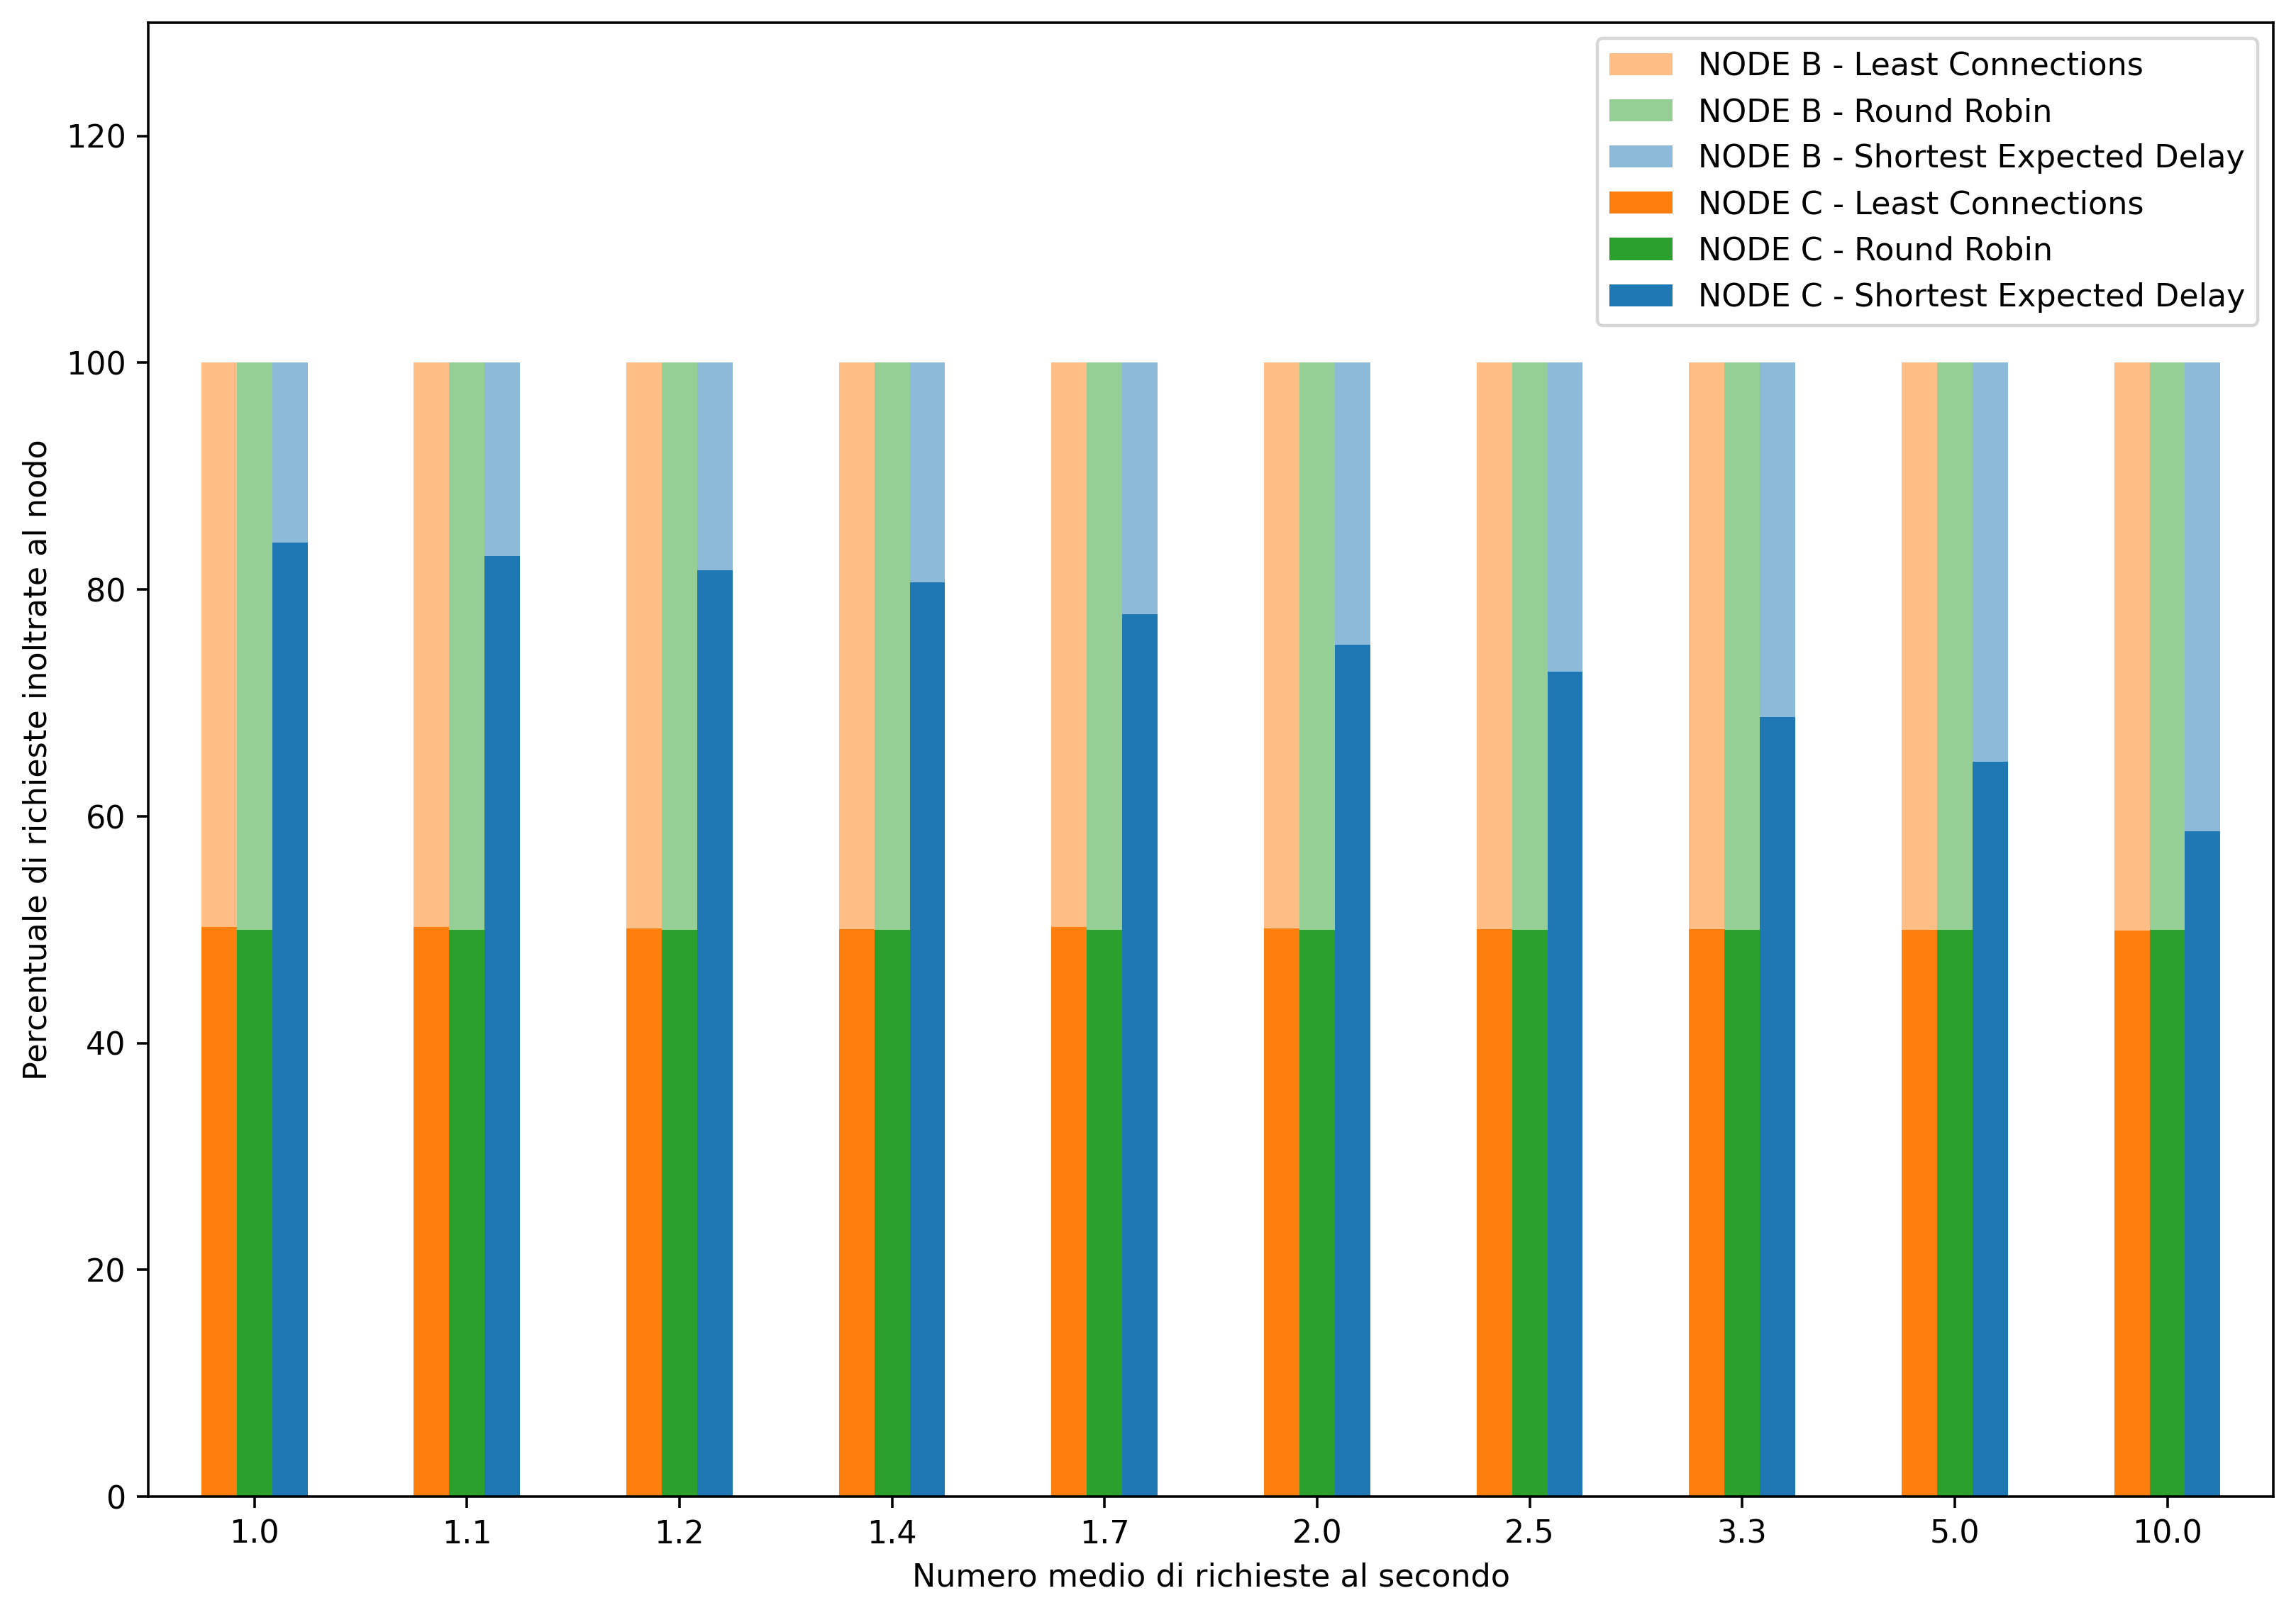

In [15]:
fig, ax = plt.subplots(layout='constrained', dpi=320, figsize=[10,7])

linecolor = [cm.tab10(1), cm.tab10(2), cm.tab10(0)]

node_c.plot(kind="bar", ax=ax, color=linecolor, alpha=0.5, rot=0)
node_c2.plot(kind="bar", ax=ax, color=linecolor, rot=0)


ax.legend([
    "NODE B - Least Connections", 
    "NODE B - Round Robin",
    "NODE B - Shortest Expected Delay",
    "NODE C - Least Connections", 
    "NODE C - Round Robin",
    "NODE C - Shortest Expected Delay"
])

ax.set_ylim(0,130)

plt.xlabel('Numero medio di richieste al secondo')
plt.ylabel('Percentuale di richieste inoltrate al nodo')
plt.show()

#TODO mettere in primo piano il NODE C

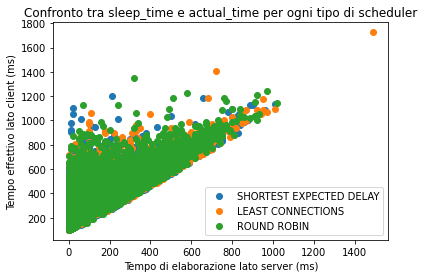

In [31]:
schedulers = df['scheduling'].unique()

for scheduler in schedulers:
    scheduler_df = df[df['scheduling'] == scheduler]
    x = scheduler_df['sleep_time (s)'] * 1000
    y = scheduler_df['actual_time (s)'] * 1000
    
    plt.scatter(x, y, label=scheduler)

plt.xlabel('Tempo di elaborazione lato server (ms)')
plt.ylabel('Tempo effettivo lato client (ms)')
plt.title('Confronto tra sleep_time e actual_time per ogni tipo di scheduler')
plt.legend()
plt.show()

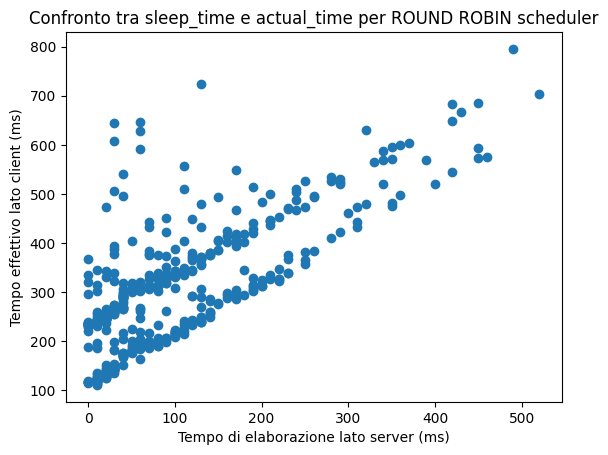

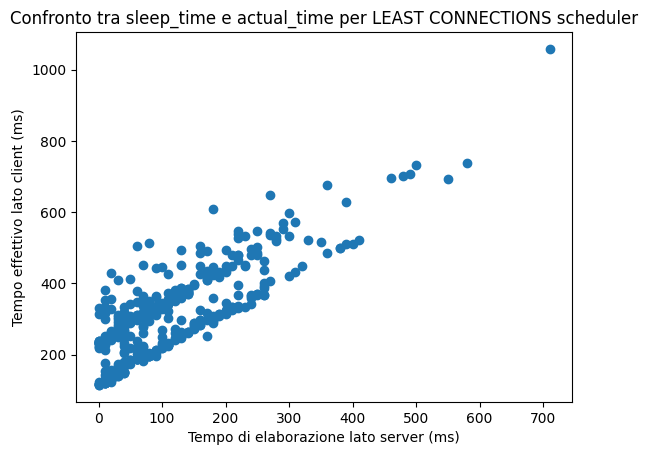

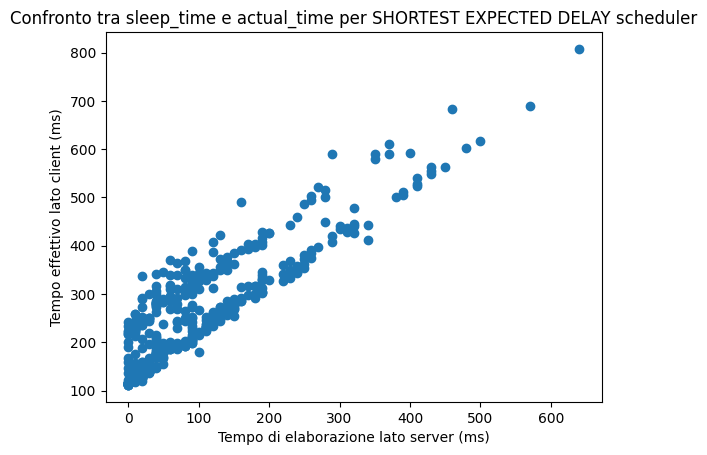

In [12]:
schedulers = df['scheduling'].unique()

for scheduler in schedulers:
    scheduler_df = df[df['scheduling'] == scheduler]
    x = scheduler_df['sleep_time (s)'] * 1000  # Converti in millisecondi
    y = scheduler_df['actual_time (s)'] * 1000  # Converti in millisecondi
    
    plt.scatter(x, y)
    plt.xlabel('Tempo di elaborazione lato server (ms)')
    plt.ylabel('Tempo effettivo lato client (ms)')
    plt.title(f'Confronto tra sleep_time e actual_time per {scheduler} scheduler')
    plt.show()

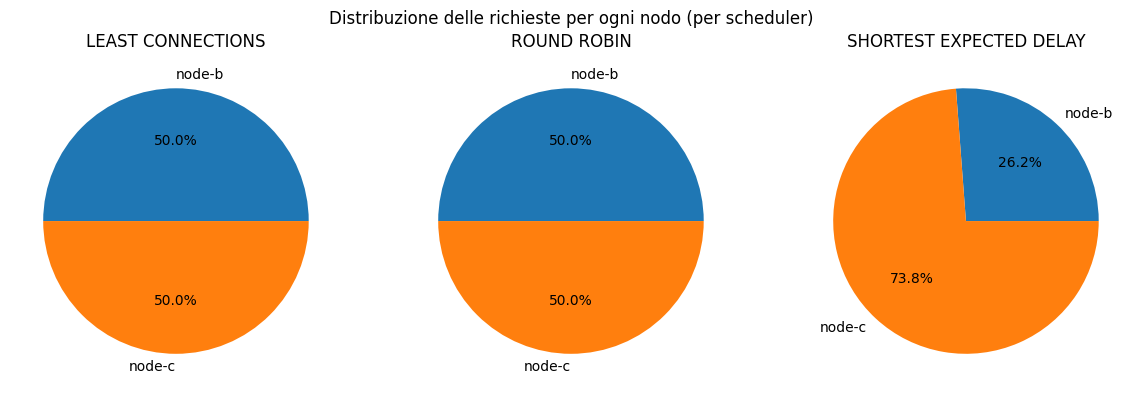

In [11]:
grouped_df = df.groupby(['scheduling', 'node']).size().unstack()
total_requests = grouped_df.sum(axis=1)
percentage_df = grouped_df.divide(total_requests, axis=0) * 100

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, scheduler in enumerate(percentage_df.index):
    node_percentages = percentage_df.loc[scheduler]
    axes[i].pie(node_percentages, labels=node_percentages.index, autopct='%1.1f%%')
    axes[i].set_title(scheduler)

plt.suptitle('Distribuzione delle richieste per ogni nodo (per scheduler)')
plt.tight_layout()
plt.show()